## Stroke Prediction Dataset EDA Project 
Dataset:
fedesoriano. 2021-01-26. Stroke Prediction Dataset, Version 1. Retrieved 2021-05-20 from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset.

Stroke is the 5th leading cause of death and disability in the United States according to the American Heart Association.  Every 40 seconds in the US, someone experiences a stroke and every 4 minutes, someone dies from it according to the CDC. A recent figure of stroke-related cost almost reached $46 billion.  Through this project, we will explore which factors are the leading drivers for stroke to bring awareness to individuals and lay the basic analysis for future work in building a predictive model using Machine Learning which could be benefitial to hospitals and insurance companies in estimating risk and pricing.

***Attribute Information
1) id: unique identifier <br> 
2) gender: "Male", "Female" or "Other"<br> 
3) age: age of the patient<br> 
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br> 
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br> 
6) ever_married: "No" or "Yes"<br> 
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br> 
8) Residence_type: "Rural" or "Urban"<br> 
9) avg_glucose_level: average glucose level in blood<br> 
10) bmi: body mass index<br> 
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br> 
12) stroke: 1 if the patient had a stroke or 0 if not<br> 
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math 
from scipy import stats
import seaborn as sns 
%matplotlib inline
plt.style.use('ggplot')

### Read in data & clean

In [4]:
df = pd.read_csv('stroke_prediction_data.csv')
df.head(10) # let's look at the top 10

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
2,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
5,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
6,42500,Male,0.24,0,0,No,children,Rural,146.97,18.5,Unknown,0
7,64974,Male,0.24,0,0,No,children,Urban,58.35,18.6,Unknown,0
8,11371,Male,0.24,0,0,No,children,Urban,89.28,14.2,Unknown,0
9,69222,Male,0.24,0,0,No,children,Urban,57.09,19.4,Unknown,0


In [14]:
df.tail(10) # let's look at the bottom 10

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,40163,Female,82.0,1,0,Yes,Private,Urban,222.52,NaN,formerly smoked,0
5101,27596,Female,82.0,1,0,Yes,Private,Urban,115.71,31.1,formerly smoked,0
5102,21830,Female,82.0,0,0,Yes,Private,Urban,82.63,17.9,smokes,0
5103,62715,Male,82.0,0,1,Yes,Private,Urban,57.56,27.5,never smoked,0
5104,19271,Female,82.0,1,1,Yes,Self-employed,Urban,101.56,31.5,never smoked,0
5105,5387,Female,82.0,0,0,No,Private,Rural,96.98,21.5,never smoked,0
5106,19191,Male,82.0,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0
5107,48118,Female,82.0,0,0,Yes,Self-employed,Urban,113.45,30.3,never smoked,0
5108,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5109,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [7]:
df.shape  #5110 rows and 12 attributes 

(5110, 12)

In [11]:
df.info() #datatypes are numeric and object (categorical) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Let's find out the stroke percentage of the record:

In [42]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

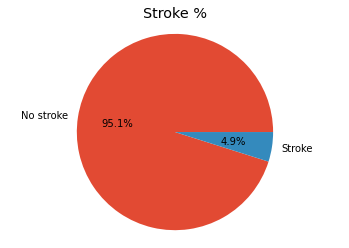

In [44]:
df_stroke = df['stroke'].value_counts()
my_labels = 'No stroke', 'Stroke'
plt.pie(df_stroke, labels = my_labels, autopct= '%1.1f%%')
plt.title('Stroke %')
plt.axis('equal')
plt.show()

In [19]:
 #Let's find out if there are any null values:  
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI (Body Mass Index) field seems to have the only null values: 201/5110 = 3.9% of the whole dataset which is negligible but before we remove them from the analysis, let's see if there are any stroke patients among the null BMI since our total stroke percentage is 4.9%:

In [50]:
len(df[df['bmi'].isna() & df['stroke']==1]) 

40

There are 40 stroke patients among the null BMI values making up 16% of total strokes! so we will NOT remove them and instead will fill in the mean BMI values in order to keep all the stroke counts:

In [52]:
bmi_mean = df['bmi'].mean()
bmi_mean = np.round(bmi_mean, 1)
bmi_mean

28.9

In [53]:
df['bmi'].fillna(bmi_mean, inplace = True) 
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,40163,Female,82.0,1,0,Yes,Private,Urban,222.52,28.9,formerly smoked,0
5101,27596,Female,82.0,1,0,Yes,Private,Urban,115.71,31.1,formerly smoked,0
5102,21830,Female,82.0,0,0,Yes,Private,Urban,82.63,17.9,smokes,0
5103,62715,Male,82.0,0,1,Yes,Private,Urban,57.56,27.5,never smoked,0
5104,19271,Female,82.0,1,1,Yes,Self-employed,Urban,101.56,31.5,never smoked,0
5105,5387,Female,82.0,0,0,No,Private,Rural,96.98,21.5,never smoked,0
5106,19191,Male,82.0,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0
5107,48118,Female,82.0,0,0,Yes,Self-employed,Urban,113.45,30.3,never smoked,0
5108,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5109,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [55]:
#Let's ensure that there is no null value left in BMI field:
df['bmi'].isna().sum()

0

Let's explore the column fields more to learn about what kind of different values the CATEGORICAL fields have:

In [56]:
df['gender'].value_counts() 

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [57]:
df[df['gender']== 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1327,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


There is 1 'Other' record in the Gender field that we can remove since the size is insignificant: 

In [60]:
df = df[df['gender'] != 'Other']
df[df['gender']== 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Let's drop the id field since we will not be using it for analysis: 

In [62]:
df.drop(['id'], axis=1, inplace = True)
df.head()

C:\Users\oyb50\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
2,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0


In [64]:
df['hypertension'].value_counts() 

0    4611
1     498
Name: hypertension, dtype: int64

In [65]:
df['heart_disease'].value_counts() 

0    4833
1     276
Name: heart_disease, dtype: int64

In [66]:
df['ever_married'].value_counts() 

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [63]:
df['work_type'].value_counts() 

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [67]:
df['Residence_type'].value_counts() 

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [69]:
df['smoking_status'].value_counts() 

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [73]:
len(df[df['smoking_status']== 'Unknown'])/len(df)

0.30221178312781366

Since the 'Unknown' category within the 'smoking_status' field makes up 30.2% of the records, we will leave it alone.  

### Exploratory Analysis 

To get a general sense, let's use heatmap correlation to see how factors correlate to each other:

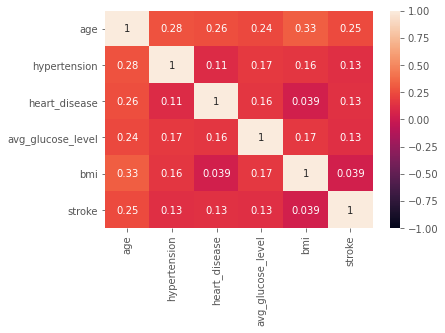

In [135]:
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True)
plt.show()

Let's look at the correlation of the Numerical fields only, with respect to each other:

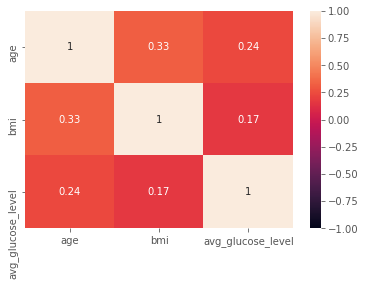

In [137]:
sns.heatmap(df[['age', 'bmi', 'avg_glucose_level']].corr(), vmin= -1, vmax= 1, annot = True)
plt.show()

We see that in general the fields have low correlation with each other.  For Stroke, the highest correlation seems to be Age.  Next, with Age, BMI field seems to be correlated the highest and then Hypertension and Heart_disease followed by Avg_glucose level.  Before we explore these correlated fields further, let's see the distributions of the Numerical fields - Age, BMI, and Avg_glucose_level:

#### Numerical Fields:

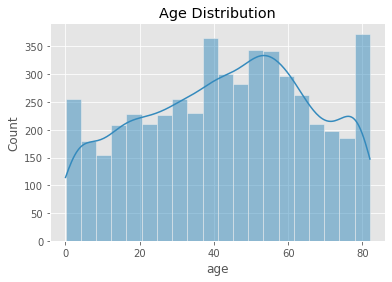

In [76]:
Age_dis = sns.histplot(df['age'], kde = True)
Age_dis.set_title("Age Distribution")
plt.show()
#Age is normally distributed

Text(0.5, 1.0, 'Estimated PDF of Age')

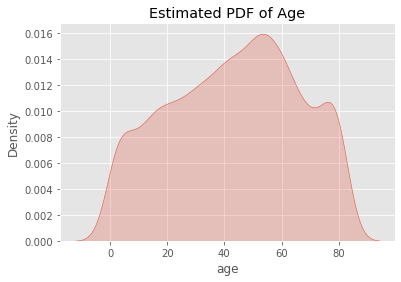

In [80]:
#Age Distribution - Prob dens function 
sns.kdeplot(data = df['age'], shade = True).set_title("Estimated PDF of Age")

Let's see the Age distribution with respect to Stroke:

Text(0.5, 1.0, 'Estimated PDF of Age and Stroke')

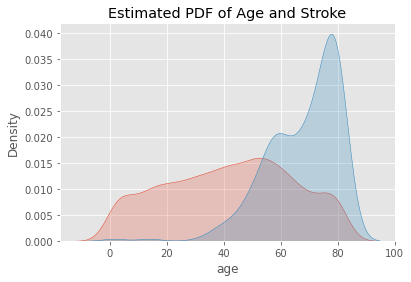

In [92]:
data1 = df[df['stroke']==0]
data2 = df[df['stroke']==1]

sns.kdeplot(data = data1, x = 'age', shade = True)
sns.kdeplot(data = data2, x = 'age', shade = True).set_title("Distribution of Age and Stroke")

Here we can clearly see that the older you get, the higher your chance of experiencing a stroke becomes, especially it gets steep after age 50.  

Let's look at BMI field -  according to the National Institutes of Health (NIH):<br> 
A BMI of less than 18.5 means that a person is underweight.<br> 
A BMI of between 18.5 and 24.9 is ideal.<br> 
A BMI of between 25 and 29.9 is overweight.<br> 
A BMI over 30 indicates obesity.<br> 

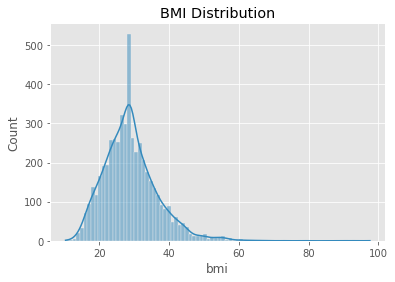

In [93]:
BMI_dis = sns.histplot(df['bmi'], kde = True)
BMI_dis.set_title("BMI Distribution")
plt.show()

BMI Distribution is skewed to the left side and the mean is around 30 - meaning that most people in this set is in the Overweight category
Let's look at the BMI probability density with respect to Stroke:

Text(0.5, 1.0, 'Distribution of Body Mass Index and Stroke')

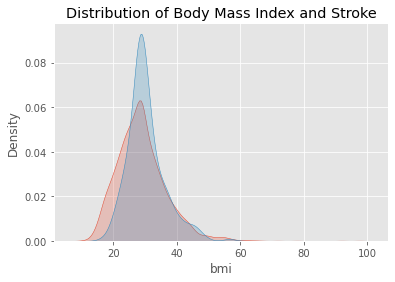

In [94]:
sns.kdeplot(data = data1, x = 'bmi', shade = True)
sns.kdeplot(data = data2, x = 'bmi', shade = True).set_title("Distribution of Body Mass Index and Stroke")

Interestingly from the plot above, this is contrary to my assumption of associating higher BMI with high body fat % in general leading me to believe that there would be strong positive correlation between BMI and stroke.  However, from the plot we can see that high BMI doesn't necessarily increase the risk of stroke which supports the weak correlation calculated in the heatmap before with respect to BMI and stroke.  

Let's look at the Average Glucose Level field - according to experts here are some range of blood sugar: <br> 
A amount less than 50mg/dL means blood sugar is critically low and requires immediate treatment.<br> 
51-70 means blood sugar is below normal levels and requires treatment.<br> 
71-90 means blood sugar should be monitored and treated as necessary. <br> 
90-180 means Healthy range.<br> 
180-250 means above normal levels. <br>
Higher than 250 means very high and requires immediate treatment

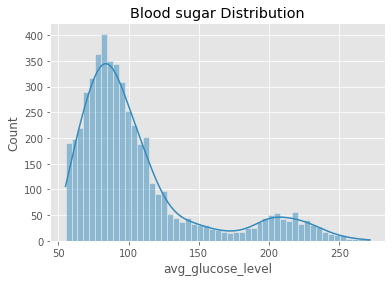

In [95]:
Glucose_dis = sns.histplot(df['avg_glucose_level'], kde = True)
Glucose_dis.set_title("Blood sugar Distribution")
plt.show()

The people who have higher than 180mg/dL blood sugar makes up 11 % of total dataset.  

In [117]:
df[df['avg_glucose_level'] >= 180].shape[0]/len(df)*100


11.411235075357212

We can see from the distribution that most people in the set are in healthy range of blood sugar with the exception of some people who have higher than 180 mg/dL having above normal levels of blood sugar making up 11% of the records. 
Let's see the Blood sugar distribution with respect to Stroke:

Text(0.5, 1.0, 'Distribution of Blood sugar and Stroke')

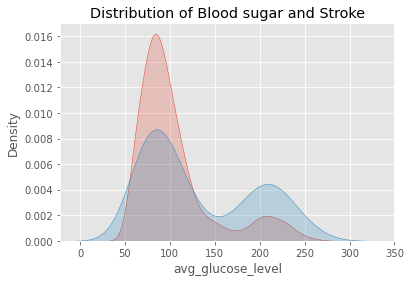

In [134]:
sns.kdeplot(data = data1, x = 'avg_glucose_level', shade = True)
sns.kdeplot(data = data2, x = 'avg_glucose_level', shade = True).set_title("Distribution of Blood sugar and Stroke")

Those 11% of people who have higher than 180mg/DL account for 32% of all strokes.  

In [132]:
high_glucose = df[df['avg_glucose_level'] >= 180]
high_glucose[high_glucose['stroke']==1].shape[0]/len(df[df['stroke']==1])*100

31.72690763052209

From the Blood Sugar and Stroke Density Distribution above, we don't see a clear trend between a high avg_glucose_level and the risk of stroke.  However, an explanation for the rise in stroke probability density among the higher than 180mg/dL glucose level group could be attributed to the presence of diabetes.  According to the American Diabetes Association, a reading between 140-200mg/dL is categorized as prediabetic and a reading of more than 200mg/dL belongs to diabetic category.  Since if you have diabetes, your chances of having a stroke are 1.5 times higher, this could be a very probable explanation for the 2nd bellcurve of stroke in the graph.  

##### Categorical fields analysis:

In order to explore the categorical fields - since many of them are binary fields with yes or no answer, I am using bar chart to first show the attribute amount and then on a second graph, show the stroke percentage within each attribute to observe any trend. 

Since this process will be repeated for each categorical field, functions are created to reduce code redundancy:

In [141]:
def bar_chart(attribute):
    return df.groupby([attribute, 'stroke'])['age'].count().unstack().plot.bar(stacked=True, figsize=(4,4), width=0.5)

def stroke_pct(attribute):
    stroke = df.groupby([attribute, 'stroke'])['age'].count()
    total = df.groupby([attribute])['age'].count()
    stroke_pct = stroke/total * 100 
    stroke_pct = stroke_pct.unstack() 
    return stroke_pct.plot.bar(stacked=True, figsize=(4,4), width=0.5)
    

Gender:

Text(0.5, 1.0, 'Stroke % in Gender')

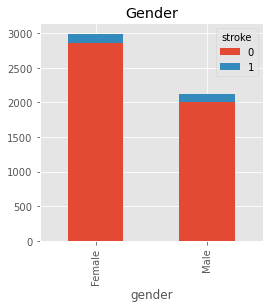

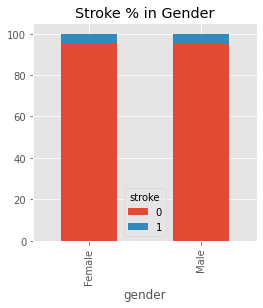

In [144]:
bar_chart('gender').set_title("Gender")
stroke_pct('gender').set_title("Stroke % in Gender")

Even though our dataset had more females than males, the stroke amount is about the same in both gender.  

Hypertension:

Text(0.5, 1.0, 'Stroke % in Hypertension')

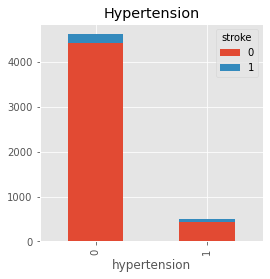

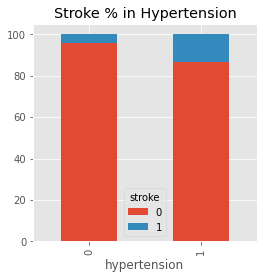

In [145]:
bar_chart('hypertension').set_title("Hypertension")
stroke_pct('hypertension').set_title("Stroke % in Hypertension")

Here we do see greater proportion of strokes in people who have hypertension versus people who don't have hypertension.  

Heart Disease:

Text(0.5, 1.0, 'Stroke % in Heart disease')

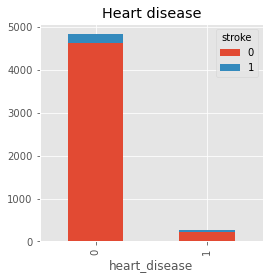

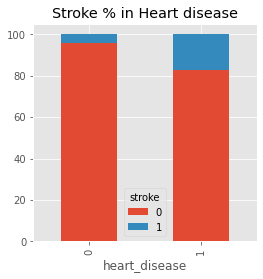

In [146]:
bar_chart('heart_disease').set_title("Heart disease")
stroke_pct('heart_disease').set_title("Stroke % in Heart disease")

As with Hypertension, we also see higher proportion of strokes in people who have Heart disease than people who don't.  While this means that there is presence of some correlation between Hypertension/Heart disease with Stroke (heatmap: 0.13 for both), we will see that this is so - due to a higher correlation of Hypertension/Heart disease with Age (heatmap: 0.28 and 0.26 respectively) : 

In [149]:
df.groupby(['hypertension'])[['age']].mean()  # notice the mean age is higher in people who have hypertension  


,age
hypertension,
0,41.176318
1,62.244980


In [151]:
df.groupby(['heart_disease'])[['age']].mean()  # notice the mean age is higher in people who have heart disease  

,age
heart_disease,
0,41.804676
1,68.188406


Ever married:

Text(0.5, 1.0, 'Stroke % in Ever Married')

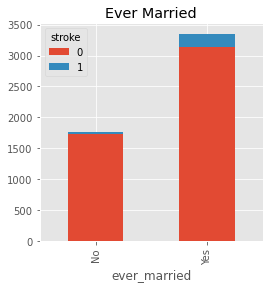

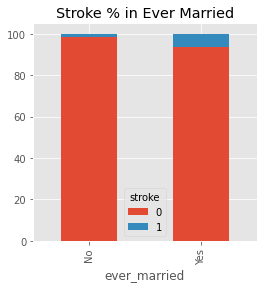

In [152]:
bar_chart('ever_married').set_title("Ever Married")
stroke_pct('ever_married').set_title("Stroke % in Ever Married")

Same case here - although it looks like stroke proportion is higher in ever being married, if we look at the age of each group, we will see that the people who answered no to ever being married are young in comparison:

In [155]:
df.groupby(['ever_married'])[['age']].agg(['count', 'mean']) # note the mean age of people who have been married to be 54

age           
             count       mean
ever_married                 
No            1756  22.011959
Yes           3353  54.342082

Work type:

Text(0.5, 1.0, 'Stroke % in Work type')

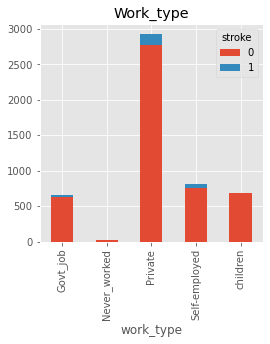

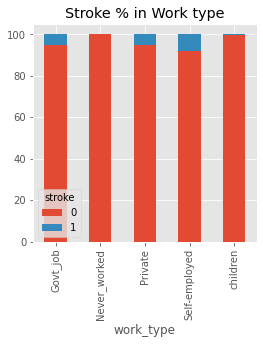

In [156]:
bar_chart('work_type').set_title("Work_type")
stroke_pct('work_type').set_title("Stroke % in Work type")

Is it because people who have never worked or are children less stressed out and therefore don't experience stroke? 
Well, not really because it goes back to age: 
Note that the age of the work type groups that experienced the highest or higher proportion of strokes are well into their middle age whereas never_worked type is of student age group and the children - really young. 

In [157]:
df.groupby(['work_type'])[['age']].agg(['count', 'mean']) 

age           
              count       mean
work_type                     
Govt_job        657  50.879756
Never_worked     22  16.181818
Private        2924  45.510602
Self-employed   819  60.201465
children        687   6.841339

Smoking Status:

bar_chart('smoking_status').set_title("Smoking Status")
stroke_pct('smoking_status').set_title("Stroke % among Smoking status")

In [164]:
df.groupby(['smoking_status', 'stroke'])[['age']].agg(['count', 'mean'])

age           
                       count       mean
smoking_status  stroke                 
Unknown         0       1497  29.112011
                1         47  65.836596
formerly smoked 0        814  53.787469
                1         70  68.628571
never smoked    0       1802  45.567703
                1         90  70.311111
smokes          0        747  46.212851
                1         42  62.809524

There isn't a clear trend with respect to smoking status.  Maybe if formerly smoked group is combined with the smokes group, we may explore further in the future.  The only definite trend seems to be age.  Stroke among ALL of the smoking status is tied to ages older than 60.   

Residence type:

Text(0.5, 1.0, 'Stroke % in Residence type')

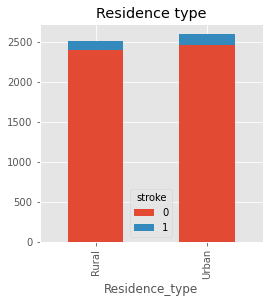

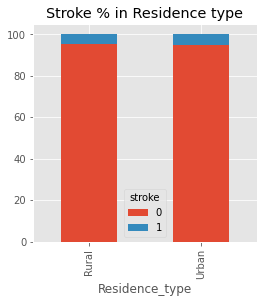

In [166]:
bar_chart('Residence_type').set_title("Residence type")
stroke_pct('Residence_type').set_title("Stroke % in Residence type")

Seems like there is no correlation between type of residence and risk of stroke.  